# Bar Chart Race in Python with Matplotlib

### Import necessary libraries

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

### Fetch the data

In [17]:
data = pd.read_csv('https://git.io/fjpo3', usecols=['name','group','year','value'])
data.head(3)

name  group  year  value
0  Agra  India  1575  200.0
1  Agra  India  1576  212.0
2  Agra  India  1577  224.0

### Data transformations

In [5]:
current_year = 2018
data_trans = data[data['year'].eq(current_year)].sort_values(by='value',ascending=True).head(10)
data_trans

name          group  year    value
2537      Karachi           Asia  2018  18185.2
4327     New York  North America  2018  18713.0
1336        Dhaka           Asia  2018  19632.6
1195        Cairo    Middle East  2018  19849.6
4679        Osaka           Asia  2018  20409.0
3574  Mexico City  Latin America  2018  21520.4
5445    Sao Paulo  Latin America  2018  21697.8
3748       Mumbai          India  2018  22120.0
689       Beijing           Asia  2018  22674.2
5547     Shanghai           Asia  2018  25778.6

### Basic chart

<BarContainer object of 10 artists>

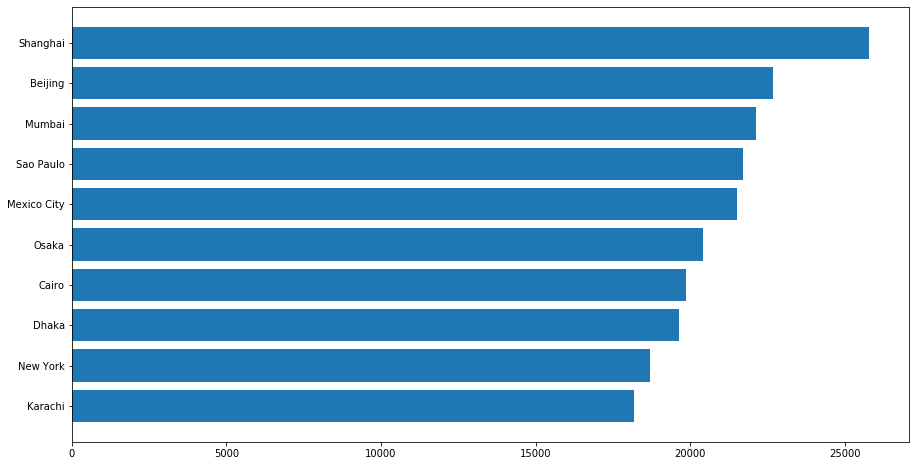

In [6]:
fig, ax = plt.subplots(figsize=(15,8))
ax.barh(data_trans['name'],data_trans['value'])

### Color, Labels

In [7]:
colors = dict(zip(['India','Europe','Asia','Latin America','Middle East','North America','Africa'],['#adb0ff','#ffb3ff','#90d595','#e48381','#aafbff','#f7bb5f','#eafb50']))
group_lk = data.set_index('name')['group'].to_dict()

Text(1, 0.4, '2018')

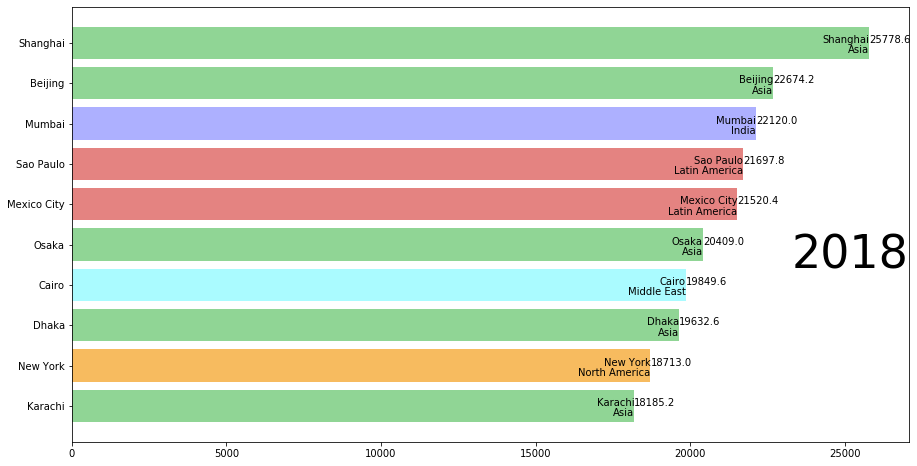

In [9]:
fig, ax = plt.subplots(figsize=(15,8))
# data_trans = data_trans[::-1] #flip values from top to bottom
# pass colors values to `color=`
ax.barh(data_trans['name'],data_trans['value'],color=[colors[group_lk[x]] for x in data_trans['name']])
# iterate over the values to plot labels and values (Tokyo, Asia, 38194.2)
for i, (value,name) in enumerate(zip(data_trans['value'],data_trans['name'])):
    ax.text(value,i,name,ha='right') # Tokyo: name
    ax.text(value,i-.25,group_lk[name], ha='right') # Asia: group name
    ax.text(value,i,value,ha='left') # 38194.2: value
# Add year right middle portion of canvas
ax.text(1,0.4,current_year,transform=ax.transAxes,size=46,ha='right')

### Polish Style

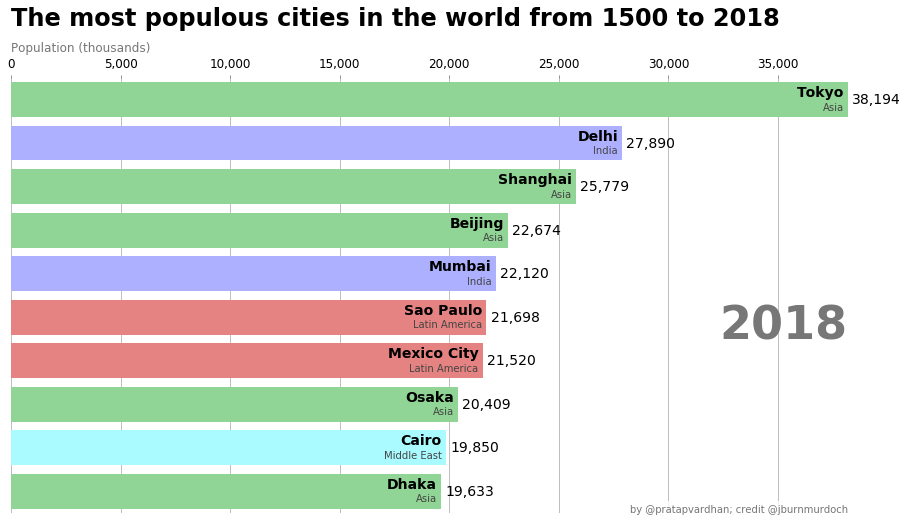

In [11]:
fig, ax = plt.subplots(figsize=(15,8))

def draw_barchart(year):
    data_trans = data[data['year'].eq(year)].sort_values(by='value',ascending=True).tail(10)
    ax.clear()
    ax.barh(data_trans['name'],data_trans['value'],color=[colors[group_lk[x]] for x in data_trans['name']])
    dx = data_trans['value'].max() / 200
    for i, (value,name) in enumerate(zip(data_trans['value'],data_trans['name'])):
        ax.text(value-dx,i,name,size=14,weight=600,ha='right',va='bottom')
        ax.text(value-dx,i-.25,group_lk[name],size=10,color='#444444',ha='right',va='baseline')
        ax.text(value+dx,i,f'{value:,.0f}',size=14,ha='left',va='center')
    ax.text(1,0.4,year,transform=ax.transAxes,color='#777777',size=46,ha='right',weight=800)
    ax.text(0,1.06,'Population (thousands)', transform=ax.transAxes,size=12,color="#777777")
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x',color='#777777',labelsize=12)
    ax.set_yticks([])
    ax.margins(0,0.01)
    ax.grid(which='major',axis='x',linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0,1.12,'The most populous cities in the world from 1500 to 2018',transform=ax.transAxes,size=24,weight=600,ha='left')
    ax.text(1,0,'by @pratapvardhan; credit @jburnmurdoch',transform=ax.transAxes,ha='right',color="#777777",bbox=dict(facecolor='white',alpha=0.8,edgecolor='white'))
    plt.box(False)

draw_barchart(2018)

### Animate Race

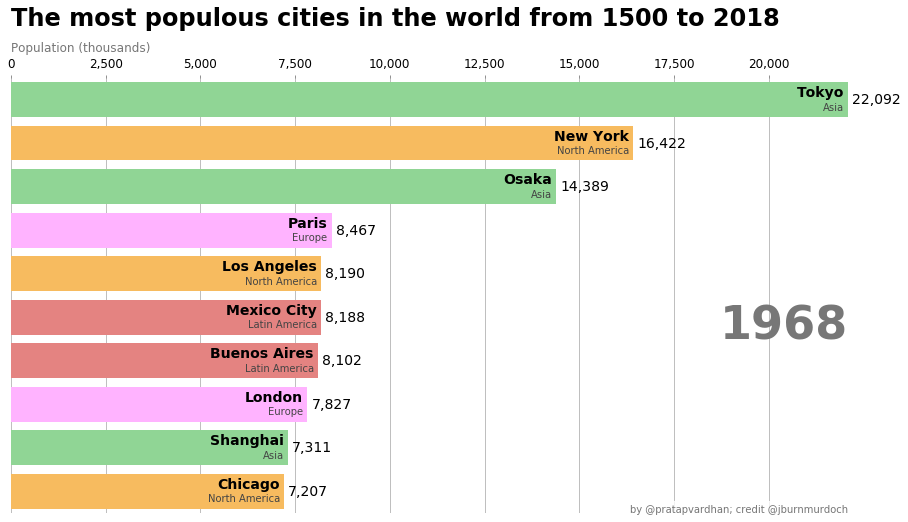

In [14]:
fig, ax = plt.subplots(figsize=(15,8))
animator = animation.FuncAnimation(fig,draw_barchart,frames=range(1968,2019))
HTML(animator.to_jshtml())